This is just an initial exploration of the dataset after being split into train and test set according to the leaf mapping. Just some information that might be useful when creating the report

# 1. Libraries

In [ ]:
#Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')  # Remount Google Drive


# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt


Mounted at /content/drive


# 2. Loading

In [ ]:
# Path to the merged training folder
train_dir = "/content/drive/MyDrive/plant_village_dataset/train_downsampled"

# Get class names (subfolder names)
class_names = sorted(os.listdir(train_dir))

# Initialize counts
pv_counts = []
doc_counts = []

for cls in class_names:
    cls_path = os.path.join(train_dir, cls)
    files = os.listdir(cls_path)

    # Count PlantVillage images (not starting with 'doc_')
    pv_count = sum(1 for f in files if not f.startswith("doc_"))
    doc_count = sum(1 for f in files if f.startswith("doc_"))

    pv_counts.append(pv_count)
    doc_counts.append(doc_count)


# 3. Some numbers

In [ ]:
print("Class-wise counts (PlantVillage | PlantDoc | Total):")
for cls, pv, doc in zip(class_names, pv_counts, doc_counts):
    total = pv + doc
    print(f"{cls:30} {pv:5d} | {doc:5d} | {total:5d}")


total_pv = sum(pv_counts)
total_doc = sum(doc_counts)
total_all = total_pv + total_doc

print("\nDataset Totals:")
print(f"PlantVillage total : {total_pv}")
print(f"PlantDoc total     : {total_doc}")
print(f"Combined total     : {total_all}")


Class-wise counts (PlantVillage | PlantDoc | Total):
Apple___Apple_scab               403 |    75 |   478
Apple___Cedar_apple_rust         201 |    71 |   272
Apple___healthy                  926 |    74 |  1000
Blueberry___healthy              906 |    94 |  1000
Cherry_(including_sour)___healthy   559 |    43 |   602
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot   372 |    58 |   430
Corn_(maize)___Common_rust_      869 |    96 |   965
Corn_(maize)___Northern_Leaf_Blight   703 |   162 |   865
Grape___Black_rot                854 |    51 |   905
Grape___healthy                  302 |    52 |   354
Peach___healthy                  296 |    92 |   388
Pepper,_bell___Bacterial_spot    759 |    56 |   815
Pepper,_bell___healthy           952 |    48 |  1000
Potato___Early_blight            681 |    98 |   779
Potato___Late_blight             728 |    88 |   816
Raspberry___healthy              243 |   101 |   344
Soybean___healthy                948 |    52 |  1000
Squash___Powdery_m

# 4. A graph of the numbers of samples per class

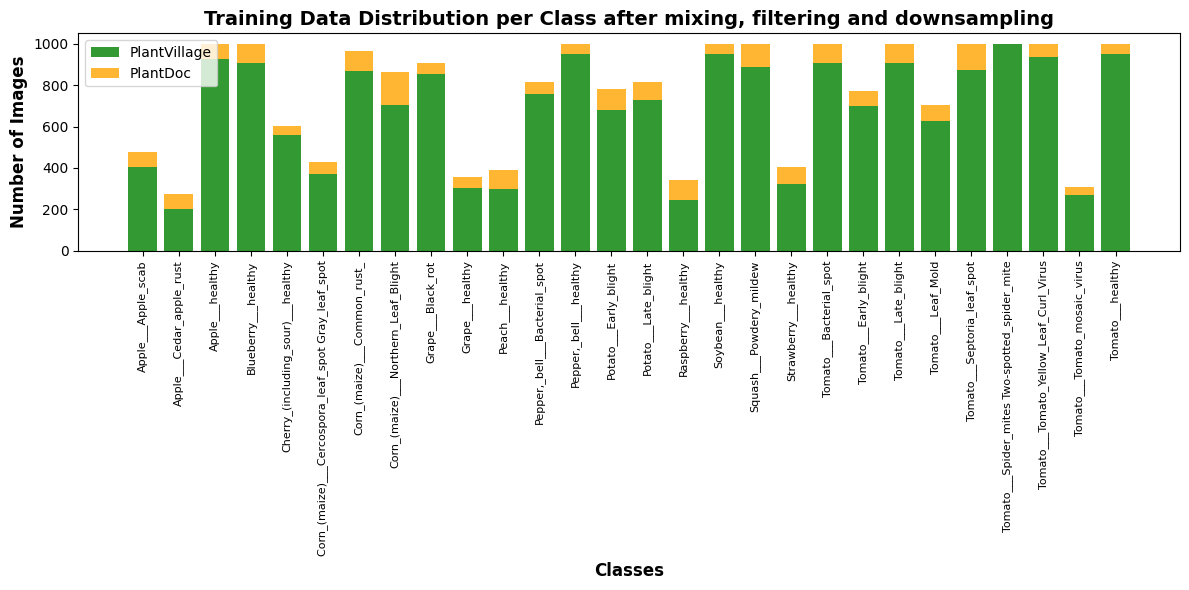

In [ ]:
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(len(class_names))

ax.bar(x, pv_counts, label="PlantVillage", color="green", alpha=0.8)
ax.bar(x, doc_counts, bottom=pv_counts, label="PlantDoc", color="orange", alpha=0.8)

ax.set_xlabel("Classes", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Images", fontsize=12, fontweight='bold')
ax.set_title("Training Data Distribution per Class after mixing, filtering and downsampling", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=90, fontsize=8)
ax.legend()
plt.tight_layout()
plt.show()

# Same counting process for validation set

note: due to limit set while downsampling, there are at most 100 plantvillage images. However, in this case, the mixing process was done after downsampling.

In [ ]:
# Path to the merged training folder
val_dir = "/content/drive/MyDrive/plant_village_dataset/val_downsampled"

# Get class names (subfolder names)
class_names = sorted(os.listdir(val_dir))

# Initialize counts
pv_counts = []
doc_counts = []

for cls in class_names:
    cls_path = os.path.join(val_dir, cls)
    files = os.listdir(cls_path)

    # Count PlantVillage images (not starting with 'doc_')
    pv_count = sum(1 for f in files if not f.startswith("doc_"))
    doc_count = sum(1 for f in files if f.startswith("doc_"))

    pv_counts.append(pv_count)
    doc_counts.append(doc_count)

In [ ]:
print("Class-wise counts (PlantVillage | PlantDoc | Total):")
for cls, pv, doc in zip(class_names, pv_counts, doc_counts):
    total = pv + doc
    print(f"{cls:30} {pv:5d} | {doc:5d} | {total:5d}")


total_pv = sum(pv_counts)
total_doc = sum(doc_counts)
total_all = total_pv + total_doc

print("\nDataset Totals:")
print(f"PlantVillage total : {total_pv}")
print(f"PlantDoc total     : {total_doc}")
print(f"Combined total     : {total_all}")

Class-wise counts (PlantVillage | PlantDoc | Total):
Apple___Apple_scab                44 |     8 |    52
Apple___Cedar_apple_rust          22 |     7 |    29
Apple___healthy                  100 |     8 |   108
Blueberry___healthy              100 |    10 |   110
Cherry_(including_sour)___healthy    62 |     4 |    66
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    41 |     6 |    47
Corn_(maize)___Common_rust_       96 |    10 |   106
Corn_(maize)___Northern_Leaf_Blight    78 |    17 |    95
Grape___Black_rot                 94 |     5 |    99
Grape___healthy                   33 |     5 |    38
Peach___healthy                   32 |    10 |    42
Pepper,_bell___Bacterial_spot     84 |     6 |    90
Pepper,_bell___healthy           100 |     5 |   105
Potato___Early_blight             75 |    10 |    85
Potato___Late_blight              80 |     9 |    89
Raspberry___healthy               27 |    11 |    38
Soybean___healthy                100 |     5 |   105
Squash___Powdery_m